In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
from sklearn.datasets import load_diabetes

In [4]:
data = load_diabetes()

In [5]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
x = data.data
y = data.target

In [7]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

L=LinearRegression()
L.fit(xtrain,ytrain)
pred = L.predict(xtest)
r2_score(ytest, pred)

0.5188113124539249

In [10]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [11]:
# Applying Ridge regr

from sklearn.linear_model import Ridge

R=Ridge(alpha = 0.01)
R.fit(xtrain,ytrain)
pred = R.predict(xtest)
r2_score(ytest, pred)

0.5230847087541541

`Larger 
𝛼
α values add more penalty to the model's coefficients, which reduces the flexibility of the model. As a result, this can lead to underfitting, where the model is too simple to capture the underlying patterns in the data.`
Smaller 
𝛼
α values reduce the penalty, making the model more flexible, potentially resulting in overfitting if the model captures too much noise from the data.
If 
𝛼
α is set to 0, ridge regression becomes equivalent to ordinary linear regression, as no regularization is applied. However, setting 
𝛼
α to 1 does not make it ordinary linear regression—it still applies a regularization term but with a moderate strength.

### Applying Ridge on ploynomial features or Polynomial regression setting

In [12]:
np.random.randn(2,1) # 2 d - 2 rows 1 column

array([[ 0.56968159],
       [-0.31255645]])

In [13]:
np.random.randn(2) # 1 d - 1 row with 2 values

array([-0.94009588, -0.15575264])

In [14]:
x = np.random.randn(100,1)
y = x**2 + 4*x + 45 + np.random.randn(100,1) # for classification tasks we refer these variables as x1 and x2 rather than x & y

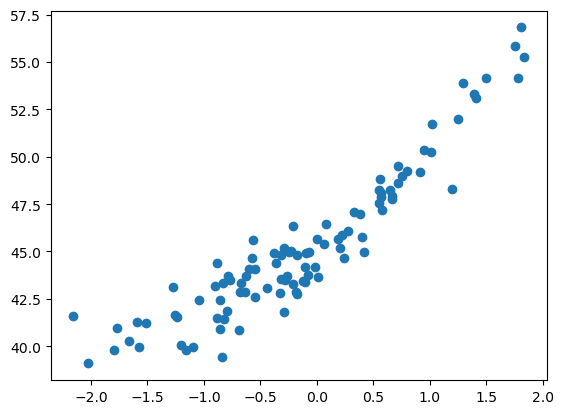

In [15]:
plt.scatter(x,y)

In [16]:
x[:,0].shape

(100,)

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)

In [18]:
# 0 alpha means no regularization term or penalty applied in the loss function
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

class Poly_with_Ridge:
    
    def __init__(self, alpha):
        self.pipe = Pipeline([
            ('poly', PolynomialFeatures(degree=3)),
            ('ridge', Ridge(alpha=alpha))
        ])
        self.coef_ = 0
        self.intercept_ = 0
    
    def fit_ridge(self, xtrain, ytrain):    
        self.pipe.fit(xtrain, ytrain)
        self.coef_ = self.pipe[1].coef_
        self.intercept_ = self.pipe[1].intercept_

    def predict(self, xtest):
        pred = self.pipe.predict(xtest)  # Use self.pipe instead of pipe
        print(r2_score(ytest, pred)) # r2_score is now imported
        return pred

In [19]:
ytrain.shape

(80, 1)

In [26]:
poly = Poly_with_Ridge(10)
poly.fit_ridge(xtrain, ytrain)

In [27]:
pred = poly.predict(xtest)

0.7082152180309822


In [21]:
poly.coef_.flatten()

array([ 0.        ,  4.25764145,  1.01815705, -0.02058955])

In [22]:
xtest.shape

(20, 1)

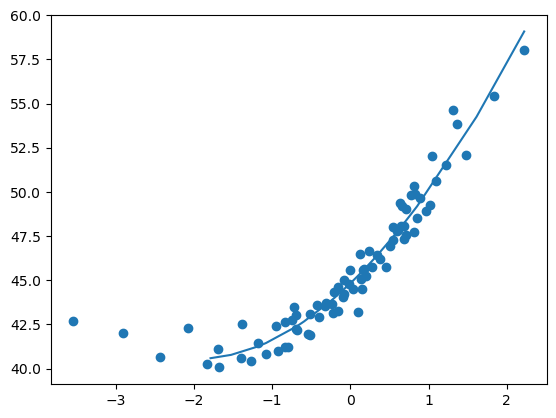

In [23]:
plt.scatter(xtrain, ytrain)
# plt.plot(xtest, pred)
plt.plot(sorted(xtest[:, 0]), pred[np.argsort(xtest[:, 0])], label= '0.01')


In [29]:
def get_preds(x, y, alpha):
    pipe = Pipeline([
        ('polyfit',PolynomialFeatures(degree = 4)),
        ('ridgepred', Ridge(alpha = alpha))
    ])
    
    pipe.fit(x,y)
    return pipe.predict(x)

In [30]:
y.shape, x.shape

((100, 1), (100, 1))

In [31]:
len(pred)

20

In [32]:
x.shape

(100, 1)

In [33]:
y.shape

(100, 1)

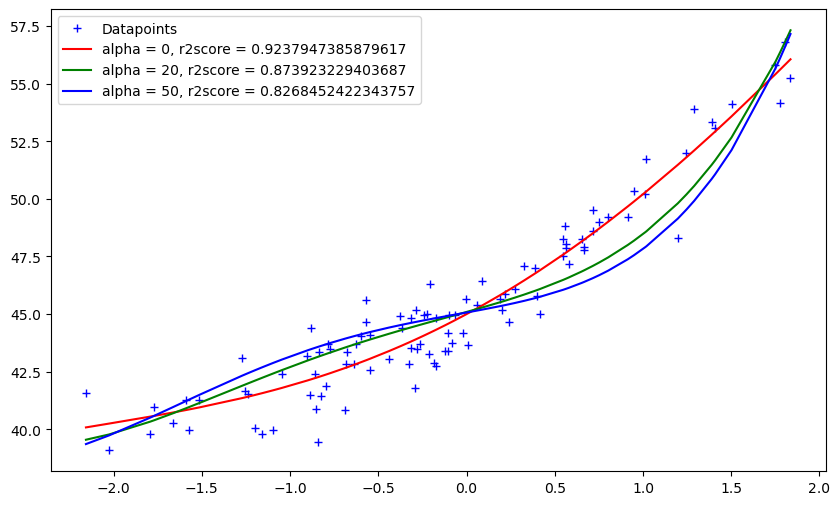

In [35]:
alphas = [0, 20, 50]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b+', label='Datapoints')

for alpha, c in zip(alphas,cs):
    preds = get_preds(x,y,alpha)
    plt.plot(sorted(x[:,0]),preds[np.argsort(x[:,0])], c= c, label = "alpha = {}, r2score = {}".format(alpha, r2_score(y,preds)))

plt.legend()
plt.show()